In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [3]:
accuracies = []
k_values = range(1, 11)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}: Accuracy={acc:.2f}")

K=1: Accuracy=0.98
K=2: Accuracy=0.98
K=3: Accuracy=1.00
K=4: Accuracy=0.98
K=5: Accuracy=1.00
K=6: Accuracy=1.00
K=7: Accuracy=1.00
K=8: Accuracy=1.00
K=9: Accuracy=1.00
K=10: Accuracy=1.00



Best K: 3


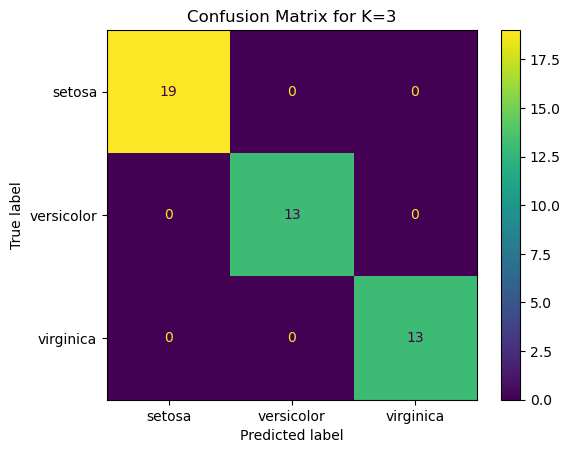

In [4]:
best_k = k_values[accuracies.index(max(accuracies))]
print(f"\nBest K: {best_k}")
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title(f"Confusion Matrix for K={best_k}")
plt.show()

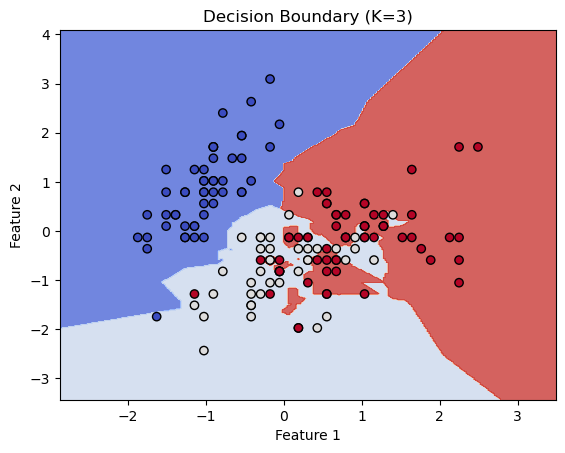

In [5]:
import numpy as np
X_vis = X_scaled[:, :2]

X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_vis, y, test_size=0.3, random_state=42)
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_v, y_train_v)

h = .02  # step size
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),                     np.arange(y_min, y_max, h))
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title(f"Decision Boundary (K={best_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()